## Dataset

We will use the following randomly generated data from sklearn.

In [9]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification

In [10]:
#Load the iris dataset from sklearn
X, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=2, random_state=1,
                           n_clusters_per_class=1)

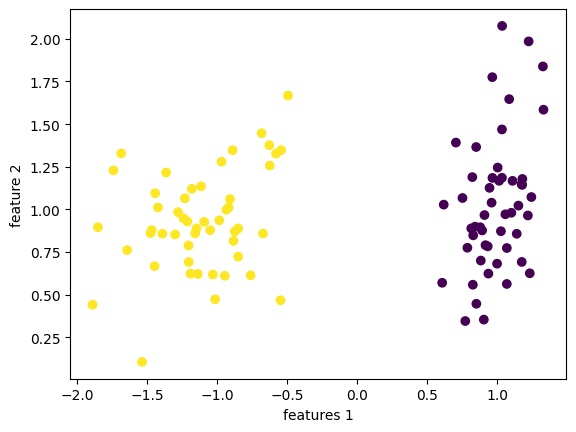

In [11]:
# vizualize the data
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('features 1')
plt.ylabel('feature 2')
plt.show()

In [12]:
def train_test_split(X,y):
  '''
  this function takes as input the sample X and the corresponding features y
  and output the training and test set
  '''
  np.random.seed(0) # To demonstrate that if we use the same seed value twice, we will get the same random number twice

  train_size = 0.8
  n = int(len(X)*train_size)
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  train_idx = indices[: n]
  test_idx = indices[n:]
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  return X_train, y_train, X_test, y_test

In [13]:
X_train, y_train, X_test, y_test = train_test_split(X,y)
print(f" the training shape is: {X_train.shape}")
print(f" the test shape is: {X_test.shape}")

 the training shape is: (80, 2)
 the test shape is: (20, 2)


## Recaps

1. Logistic/sigmoid function:
\begin{equation}
σ(z)= \dfrac{1}{1+ e^{-z}}
\end{equation}
where  $z= x w$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
σ'(z)= σ(z)(1-σ(z))
\end{equation}
3. Negative log likelihood or Cross-entropy loss:
\begin{equation}
l(w)= -\dfrac{1}{N}\sum_{i= 1}^{N} \left(y^{(i)}_{true} \times \log y^{(i)}_{pred} + (1-y^{(i)}_{true}) \times \log (1-y^{(i)}_{pred}) \right)
\end{equation}

where:

 $y_{pred}= σ(z)$, $z= xw$.

4. Derivative of Cross-entropy loss with respective to $w$:
\begin{equation}
dl(w)= -\dfrac{1}{N}x^T(y_{true} -y_{ped} )
\end{equation}
5. Apply Batch gradient descent to update $w$.



In [168]:
# @title
class LogisticRegression1:
  '''
  The goal of this class is to create a LogisticRegression class,
  that we will use as our model to classify data point into a corresponding class
  '''
  def __init__(self,lr,n_epochs):
    self.lr = lr
    self.n_epochs = n_epochs
    self.train_losses = []
    self.w = None
    self.weight = []

  def add_ones(self, x):

    ##### WRITE YOUR CODE HERE #####
    return np.hstack((np.ones(x.shape[0]),x))
    #### END CODE ####

  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE ####
    z = x@ self.w
    return 1/(1 + np.exp(-z))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    y_pred = self.sigmoid(x)
    loss = (-1/y_true.shape[0])*np.sum(y_true * np.log(y_pred)+ (1-y_true)*np.log(1-y_pred))
    return loss
    #### END CODE ####


  def predict_proba(self,x):  #This function will use the sigmoid function to compute the probalities
    ##### WRITE YOUR CODE HERE #####
    proba = self.sigmoid(x)
    return proba
    #### END CODE ####

  def predict(self,x):

    ##### WRITE YOUR CODE HERE #####
    x  = self.add_ones(x)
    probas = self.sigmoid(x)
    output = (probas>= .5).astype(int)   #0 if probas< .5 else 0    #np.where(probas < .5,0, 1)    #convert the probalities into 0 and 1 by using a treshold=0.5
    return output
    #### END CODE ####

  def fit(self,x,y):

    # Add ones to x
    x = self.add_ones(x)
    # reshape y if needed

    # Initialize w to zeros vector >>> (x.shape[1])
    w = np.zeros(x.shape[1])


    for epoch in range(self.n_epochs):

      # make predictions
      ypred = self.predict_proba(x)

      #compute the gradient
      grads = (-1/y.shape[0])*np.transpose(x)*(y - ypred)

      #update rule
      self.w = self. w - self.lr * grads

      #Compute and append the training loss in a list
      loss = self.cross_entropy(x,y)
      self.losses.append(loss)

      if epoch%1000 == 0:
        print(f'loss for epoch {epoch}  : {loss}')

  def accuracy(self,y_true, y_pred):
    ##### WRITE YOUR CODE HERE #####
    acc = y_true/y_pred
    return acc
    #### END CODE ####

In [193]:
class LogisticRegression:
    '''
    The goal of this class is to create a LogisticRegression class,
    that we will use as our model to classify data point into a corresponding class
    '''
    def __init__(self, lr, n_epochs):
        self.lr = lr
        self.n_epochs = n_epochs
        self.train_losses = []
        self.w = None
        self.losses = []

    def add_ones(self, x):
        ##### WRITE YOUR CODE HERE #####
        return np.hstack((np.ones((x.shape[0], 1)), x))
        #### END CODE ####

    def sigmoid(self, x):
        ##### WRITE YOUR CODE HERE ####
        z = x @ self.w
        return 1 / (1 + np.exp(-z))
        #### END CODE ####

    def cross_entropy(self, x, y_true):
        ##### WRITE YOUR CODE HERE #####
        y_pred = self.sigmoid(x)
        loss = (-1 / y_true.shape[0]) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
        #### END CODE ####

    def predict_proba(self, x):  # This function will use the sigmoid function to compute the probabilities
        ##### WRITE YOUR CODE HERE #####
        proba = self.sigmoid(x)
        return proba
        #### END CODE ####

    def predict(self, x):
        ##### WRITE YOUR CODE HERE #####
        x = self.add_ones(x)
        probas = self.sigmoid(x)
        output =  np.where(probas <= 0.5, 0, 1) #(probas >= 0.5).astype(int) #0 if probas< .5 else 0    #np.where(probas < .5,0, 1)    #convert the probalities into 0 and 1 by using a treshold=0.5
        return output
        #### END CODE ####

    def fit(self, x, y):
        # Add ones to x
        x = self.add_ones(x)
        y = y.reshape((80,1))
        # Initialize w to zeros vector >>> (x.shape[1])
        self.w = np.zeros((x.shape[1],1))

        for epoch in range(self.n_epochs):
            # make predictions
            ypred = self.predict_proba(x)
            # compute the gradient
            grads = (-1 / x.shape[0]) * np.transpose(x) @(y - ypred)    # np.dot(x.T, (y - ypred))
            # update rule
            self.w = self.w - self.lr * grads
            # Compute and append the training loss in a list
            loss = self.cross_entropy(x, y)
            self.train_losses.append(loss)
            if epoch % 1000 == 0:
                print(f'loss for epoch {epoch}  : {loss}')

    def accuracy(self, y_true, y_pred):
        ##### WRITE YOUR CODE HERE #####
        acc = np.mean(y_true == y_pred)    #Commit 1 Revenir
        return acc
        #### END CODE #### n


In [196]:
# @title Default title text
model = LogisticRegression(0.01,n_epochs=10000)
model.fit(X_train,y_train)

loss for epoch 0  : 0.69221251190567
loss for epoch 1000  : 0.4094264786681334
loss for epoch 2000  : 0.36717104683068114
loss for epoch 3000  : 0.34967089396961776
loss for epoch 4000  : 0.3398009917034255
loss for epoch 5000  : 0.33351155013649664
loss for epoch 6000  : 0.32925926065411315
loss for epoch 7000  : 0.32628216575857033
loss for epoch 8000  : 0.3241469829077723
loss for epoch 9000  : 0.3225871202718992


In [197]:
ypred_train = model.predict(X_train)
acc = model.accuracy(y_train,ypred_train)
print(f"The training accuracy is: {acc}")
print(" ")

ypred_test = model.predict(X_test)
acc = model.accuracy(y_test,ypred_test)
print(f"The test accuracy is: {acc}")

The training accuracy is: 0.500625
 
The test accuracy is: 0.52


In [198]:
def plot_decision_boundary(X, w, b,y_train):

    # z = w1x1 + w2x2 + w0
    # one can think of the decision boundary as the line x2=mx1+c
    # Solving we find m and c
    x1 = [X[:,0].min(), X[:,0].max()]
    m = -w[1]/w[2]
    c = -b/w[2]
    x2 = m*x1 + c

    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0], X[:, 1],c=y_train)
    plt.scatter(X[:, 0], X[:, 1], c=y_train)
    plt.xlim([-2, 3])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

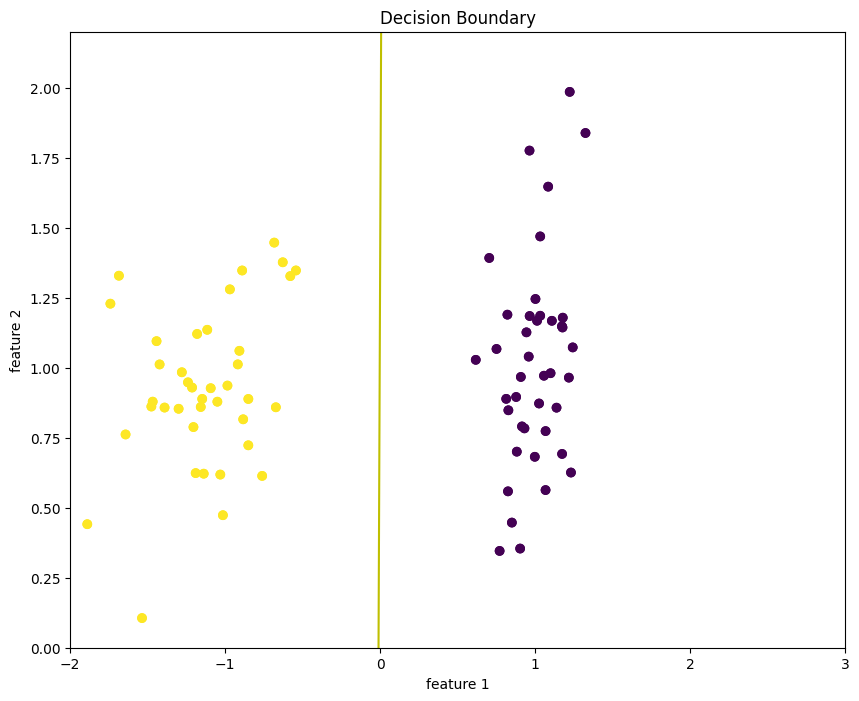

In [167]:
plot_decision_boundary(X_train,model.w,model.w[0],y_train)

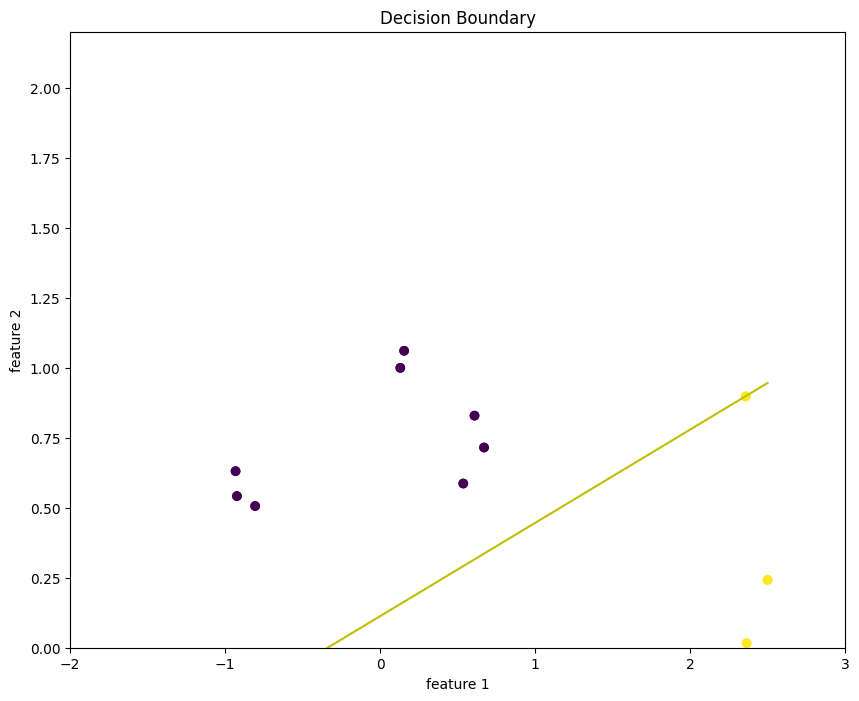

In [199]:
plot_decision_boundary(X_test,model.w,model.w[0],y_test)

## Let’s test out our code for data that is not linearly separable.


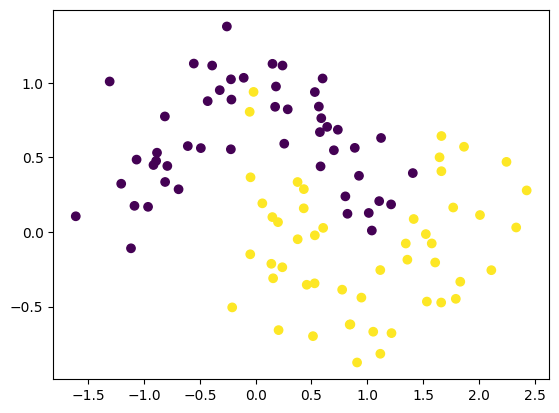

In [200]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.24)
plt.scatter(X[:,0],X[:,1], c= y)

In [176]:
X_train, y_train, X_test, y_test = train_test_split(X,y)

In [201]:
model2 = LogisticRegression(0.01,n_epochs = 10000)
model2.fit(X_train,y_train)

loss for epoch 0  : 0.69221251190567
loss for epoch 1000  : 0.4094264786681334
loss for epoch 2000  : 0.36717104683068114
loss for epoch 3000  : 0.34967089396961776
loss for epoch 4000  : 0.3398009917034255
loss for epoch 5000  : 0.33351155013649664
loss for epoch 6000  : 0.32925926065411315
loss for epoch 7000  : 0.32628216575857033
loss for epoch 8000  : 0.3241469829077723
loss for epoch 9000  : 0.3225871202718992


In [202]:
ypred_train = model2.predict(X_train)
acc = model2.accuracy(y_train, ypred_train)

print(f"The training acuuracy is: {acc}")
print("  ")

ypred_test = model2.predict(X_test)
acc = model2.accuracy(y_test,ypred_test)
print(f"The test accuracy is:  {acc}")

The training acuuracy is: 0.500625
  
The test accuracy is:  0.52


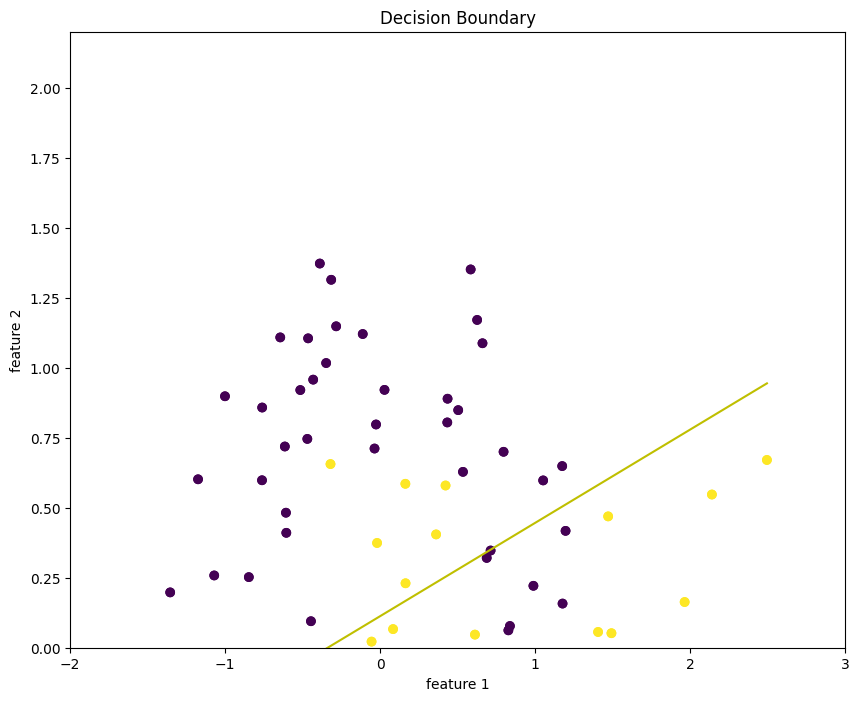

In [203]:
plot_decision_boundary(X_train,model2.w, model2.w[0], y_train)

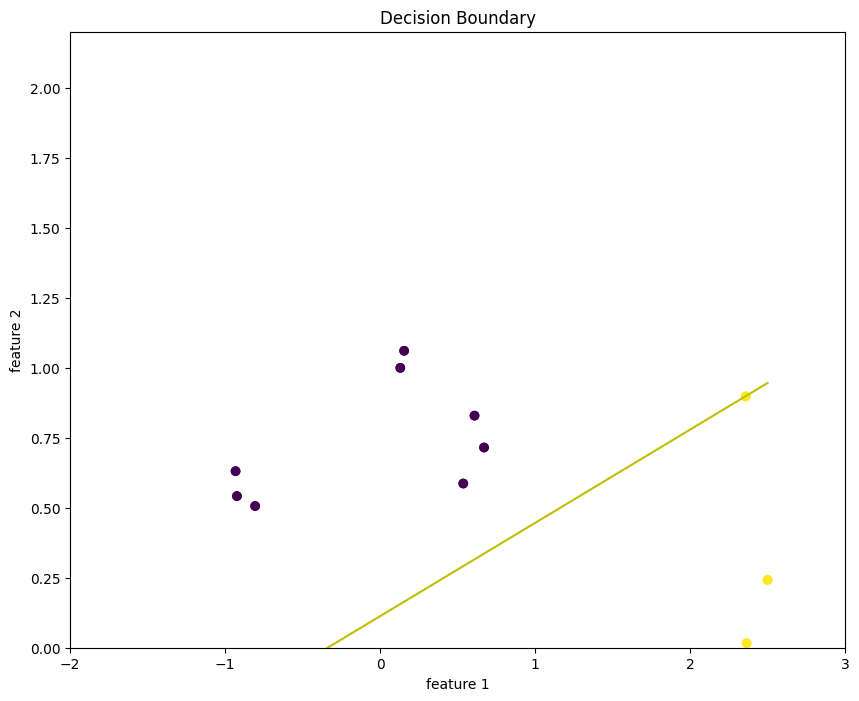

In [204]:
plot_decision_boundary(X_test, model2.w, model2.w[0], y_test)